In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import odeint
from customplotting.general import plot_xy, save_fig
from functions import *
from scipy import signal
# from Fit_functions_with_irf import *
from scipy.optimize import Bounds

In [2]:
"""Recycle params for plotting"""
plt.rc('xtick', labelsize = 30)
plt.rc('xtick.major', pad = 3)
plt.rc('ytick', labelsize = 30)
plt.rc('lines', lw = 3.5, markersize = 20.5)
plt.rc('legend', fontsize = 30)
plt.rc('axes', linewidth = 3.5)

In [3]:

A1 = pd.read_csv('/Users/aaron/OneDrive/Desktop/Chemistry/Lab/Data/4_28_22/A1_ref_Br15_1MHz_32ps.csv', names=['XAxis', 'Counts'], delimiter=',',index_col=False)
A2 = pd.read_csv('/Users/aaron/OneDrive/Desktop/Chemistry/Lab/Data/4_28_22/A2_APTMS_Br15_1MHz_32ps.csv', names=['XAxis', 'Counts'], delimiter=',',index_col=False)
A3 = pd.read_csv('/Users/aaron/OneDrive/Desktop/Chemistry/Lab/Data/4_28_22/A3_anthraTMS_Br15_1MHz_32ps.csv', names=['XAxis', 'Counts'], delimiter=',',index_col=False)
A4 = pd.read_csv('/Users/aaron/OneDrive/Desktop/Chemistry/Lab/Data/4_28_22/A4_PanthraTES_Br15_1MHz_32ps.csv', names=['XAxis', 'Counts'], delimiter=',',index_col=False)
B1 = pd.read_csv('/Users/aaron/OneDrive/Desktop/Chemistry/Lab/Data/4_29_22/B1_ref_Br15_2MHz_32ps.csv', names=['XAxis', 'Counts'], delimiter=',',index_col=False)
B2 = pd.read_csv('/Users/aaron/OneDrive/Desktop/Chemistry/Lab/Data/4_29_22/B2_APTMS_Br15_2MHz_32ps.csv', names=['XAxis', 'Counts'], delimiter=',',index_col=False)
B3 = pd.read_csv('/Users/aaron/OneDrive/Desktop/Chemistry/Lab/Data/4_29_22/B3_anthraTMS_Br15_2MHz_32ps.csv', names=['XAxis', 'Counts'], delimiter=',',index_col=False)
B4 = pd.read_csv('/Users/aaron/OneDrive/Desktop/Chemistry/Lab/Data/4_29_22/B4_PanthraTES_Br15_2MHz_32ps.csv', names=['XAxis', 'Counts'], delimiter=',',index_col=False)
C1 = pd.read_csv('/Users/aaron/OneDrive/Desktop/Chemistry/Lab/Data/4_29_22/C1_ref_Br15_2MHz_32ps.csv', names=['XAxis', 'Counts'], delimiter=',',index_col=False)
C2 = pd.read_csv('/Users/aaron/OneDrive/Desktop/Chemistry/Lab/Data/4_29_22/C2_APTMS_Br15_1MHz_32ps.csv', names=['XAxis', 'Counts'], delimiter=',',index_col=False)
C3 = pd.read_csv('/Users/aaron/OneDrive/Desktop/Chemistry/Lab/Data/4_29_22/C3_anthraTMS_Br15_2MHz_32ps.csv', names=['XAxis', 'Counts'], delimiter=',',index_col=False)
C4 = pd.read_csv('/Users/aaron/OneDrive/Desktop/Chemistry/Lab/Data/4_29_22/C4_PanthraTES_Br15_2MHz_32ps.csv', names=['XAxis', 'Counts'], delimiter=',',index_col=False)

In [4]:
B2


,XAxis,Counts
0,0.000,3
1,0.032,8
2,0.064,2
3,0.096,9
4,0.128,3
...,...,...
15620,499.840,0
15621,499.872,0
15622,499.904,0
15623,499.936,0


In [5]:
print(np.argmax(A2['Counts']))

1014


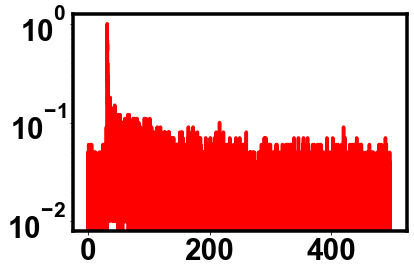

In [6]:
plotter = B4
plt.plot(plotter['XAxis'].values, plotter['Counts'].values/np.max(plotter['Counts'].values), label = 'A4', c= 'red')
plt.yscale('log')

In [7]:
A1_fit = pd.read_csv('/Users/aaron/OneDrive/Desktop/Chemistry/Lab/Data/4_28_22/A1_ref_Br15_1MHz_32ps.csv', names=['XAxis', 'Counts'], skiprows=np.argmax(A1['Counts']), delimiter=',',index_col=False)
A2_fit = pd.read_csv('/Users/aaron/OneDrive/Desktop/Chemistry/Lab/Data/4_28_22/A2_APTMS_Br15_1MHz_32ps.csv', names=['XAxis', 'Counts'], skiprows=np.argmax(A2['Counts']),delimiter=',',index_col=False)
A3_fit = pd.read_csv('/Users/aaron/OneDrive/Desktop/Chemistry/Lab/Data/4_28_22/A3_anthraTMS_Br15_1MHz_32ps.csv', names=['XAxis', 'Counts'], skiprows=np.argmax(A3['Counts']),delimiter=',',index_col=False)
A4_fit = pd.read_csv('/Users/aaron/OneDrive/Desktop/Chemistry/Lab/Data/4_28_22/A4_PanthraTES_Br15_1MHz_32ps.csv', names=['XAxis', 'Counts'], skiprows=np.argmax(A4['Counts']),delimiter=',',index_col=False)
B1_fit = pd.read_csv('/Users/aaron/OneDrive/Desktop/Chemistry/Lab/Data/4_29_22/B1_ref_Br15_2MHz_32ps.csv', names=['XAxis', 'Counts'], skiprows=np.argmax(B1['Counts']),delimiter=',',index_col=False)
B2_fit = pd.read_csv('/Users/aaron/OneDrive/Desktop/Chemistry/Lab/Data/4_29_22/B2_APTMS_Br15_2MHz_32ps.csv', names=['XAxis', 'Counts'], skiprows=np.argmax(B2['Counts']),delimiter=',',index_col=False)
B3_fit = pd.read_csv('/Users/aaron/OneDrive/Desktop/Chemistry/Lab/Data/4_29_22/B3_anthraTMS_Br15_2MHz_32ps.csv', names=['XAxis', 'Counts'], skiprows=np.argmax(B3['Counts']),delimiter=',',index_col=False)
B4_fit = pd.read_csv('/Users/aaron/OneDrive/Desktop/Chemistry/Lab/Data/4_29_22/B4_PanthraTES_Br15_2MHz_32ps.csv', names=['XAxis', 'Counts'], skiprows=np.argmax(B4['Counts']),delimiter=',',index_col=False)
C1_fit = pd.read_csv('/Users/aaron/OneDrive/Desktop/Chemistry/Lab/Data/4_29_22/C1_ref_Br15_2MHz_32ps.csv', names=['XAxis', 'Counts'], skiprows=np.argmax(C1['Counts']),delimiter=',',index_col=False)
C2_fit = pd.read_csv('/Users/aaron/OneDrive/Desktop/Chemistry/Lab/Data/4_29_22/C2_APTMS_Br15_1MHz_32ps.csv', names=['XAxis', 'Counts'], skiprows=np.argmax(C2['Counts']),delimiter=',',index_col=False)
C3_fit = pd.read_csv('/Users/aaron/OneDrive/Desktop/Chemistry/Lab/Data/4_29_22/C3_anthraTMS_Br15_2MHz_32ps.csv', names=['XAxis', 'Counts'], skiprows=np.argmax(C3['Counts']),delimiter=',',index_col=False)
C4_fit = pd.read_csv('/Users/aaron/OneDrive/Desktop/Chemistry/Lab/Data/4_29_22/C4_PanthraTES_Br15_2MHz_32ps.csv', names=['XAxis', 'Counts'], skiprows=np.argmax(C4['Counts']),delimiter=',',index_col=False)


100


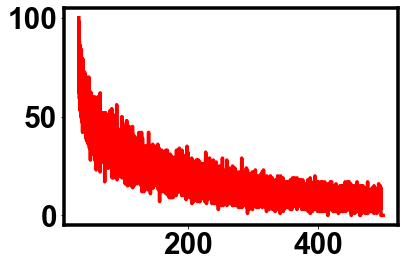

In [8]:
test_fit = B2_fit
# plt.plot(test_fit['XAxis'].values, test_fit['Counts'].values/np.max(test_fit['Counts'].values), label = 'A2', c= 'red')
plt.plot(test_fit['XAxis'].values, test_fit['Counts'].values, label = 'A2', c= 'red')
# plt.yscale('log')
print(np.max(test_fit['Counts'].values))

In [10]:
stretched_A1 = stretch_exp_fit(A1_fit['Counts'].values/np.max(A1_fit['Counts'].values), A1_fit['XAxis'].values*1e-9, Tc = (0,1e4*1e-9), Beta = (0,1), A = (0,1))
stretched_A2 = stretch_exp_fit(A2_fit['Counts'].values/np.max(A2_fit['Counts'].values), A2_fit['XAxis'].values*1e-9, Tc = (0,1e4*1e-9), Beta = (0,1), A = (0,1))
stretched_A3 = stretch_exp_fit(A3_fit['Counts'].values/np.max(A3_fit['Counts'].values), A3_fit['XAxis'].values*1e-9, Tc = (0,1e4*1e-9), Beta = (0,1), A = (0,1))
stretched_A4 = stretch_exp_fit(A4_fit['Counts'].values/np.max(A4_fit['Counts'].values), A4_fit['XAxis'].values*1e-9, Tc = (0,1e4*1e-9), Beta = (0,1), A = (0,1))
stretched_B1 = stretch_exp_fit(B1_fit['Counts'].values/np.max(B1_fit['Counts'].values), B1_fit['XAxis'].values*1e-9, Tc = (0,1e4*1e-9), Beta = (0,1), A = (0,1))
stretched_B2 = stretch_exp_fit(B2_fit['Counts'].values/np.max(B2_fit['Counts'].values), B2_fit['XAxis'].values*1e-9, Tc = (0,1e4*1e-9), Beta = (0,1), A = (0,1))
stretched_B3 = stretch_exp_fit(B3_fit['Counts'].values/np.max(B3_fit['Counts'].values), B3_fit['XAxis'].values*1e-9, Tc = (0,1e4*1e-9), Beta = (0,1), A = (0,1))
stretched_B4 = stretch_exp_fit(B4_fit['Counts'].values/np.max(B4_fit['Counts'].values), B4_fit['XAxis'].values*1e-9, Tc = (0,1e4*1e-9), Beta = (0,1), A = (0,1))
stretched_C1 = stretch_exp_fit(C1_fit['Counts'].values/np.max(C1_fit['Counts'].values), C1_fit['XAxis'].values*1e-9, Tc = (0,1e4*1e-9), Beta = (0,1), A = (0,1))
stretched_C2 = stretch_exp_fit(C2_fit['Counts'].values/np.max(C2_fit['Counts'].values), C2_fit['XAxis'].values*1e-9, Tc = (0,1e4*1e-9), Beta = (0,1), A = (0,1))
stretched_C3 = stretch_exp_fit(C3_fit['Counts'].values/np.max(C3_fit['Counts'].values), C3_fit['XAxis'].values*1e-9, Tc = (0,1e4*1e-9), Beta = (0,1), A = (0,1))
stretched_C4 = stretch_exp_fit(C4_fit['Counts'].values/np.max(C4_fit['Counts'].values), C4_fit['XAxis'].values*1e-9, Tc = (0,1e4*1e-9), Beta = (0,1), A = (0,1))


In [11]:
test = stretched_B2
print("tau_c (ns) = "+str(test[0]*1e9))
print("Beta = "+str(test[1]))
print("avg. tau (ns) = "+str(test[3]*1e9))

tau_c (ns) = 82.63273315422427
Beta = 0.5579792068531241
avg. tau (ns) = 137.62738861491746


In [12]:
stretched_B2

(8.263273315422427e-08,
 0.5579792068531241,
 0.9968595932098789,
 1.3762738861491746e-07,
 array([0.55277898, 0.55259754, 0.55241624, ..., 0.06500265, 0.06499631,
        0.06498997]))

In [14]:
double_A1 = double_exp_fit(A1_fit['Counts'].values/np.max(A1_fit['Counts'].values), A1_fit['XAxis'].values*1e-9, tau1_bounds=(0,1000*1e-9), a1_bounds=(0,1), tau2_bounds=(0,10000*1e-9), a2_bounds=(0,1))
double_A2 = double_exp_fit(A2_fit['Counts'].values/np.max(A2_fit['Counts'].values), A2_fit['XAxis'].values*1e-9, tau1_bounds=(0,1000*1e-9), a1_bounds=(0,1), tau2_bounds=(0,10000*1e-9), a2_bounds=(0,1))
double_A3 = double_exp_fit(A3_fit['Counts'].values/np.max(A3_fit['Counts'].values), A3_fit['XAxis'].values*1e-9, tau1_bounds=(0,1000*1e-9), a1_bounds=(0,1), tau2_bounds=(0,10000*1e-9), a2_bounds=(0,1))
double_A4 = double_exp_fit(A4_fit['Counts'].values/np.max(A4_fit['Counts'].values), A4_fit['XAxis'].values*1e-9, tau1_bounds=(0,1000*1e-9), a1_bounds=(0,1), tau2_bounds=(0,10000*1e-9), a2_bounds=(0,1))
double_B1 = double_exp_fit(B1_fit['Counts'].values/np.max(B1_fit['Counts'].values), B1_fit['XAxis'].values*1e-9, tau1_bounds=(0,1000*1e-9), a1_bounds=(0,1), tau2_bounds=(0,10000*1e-9), a2_bounds=(0,1))
double_B2 = double_exp_fit(B2_fit['Counts'].values/np.max(B2_fit['Counts'].values), B2_fit['XAxis'].values*1e-9, tau1_bounds=(0,1000*1e-9), a1_bounds=(0,1), tau2_bounds=(0,10000*1e-9), a2_bounds=(0,1))
double_B3 = double_exp_fit(B3_fit['Counts'].values/np.max(B3_fit['Counts'].values), B3_fit['XAxis'].values*1e-9, tau1_bounds=(0,1000*1e-9), a1_bounds=(0,1), tau2_bounds=(0,10000*1e-9), a2_bounds=(0,1))
double_B4 = double_exp_fit(B4_fit['Counts'].values/np.max(B4_fit['Counts'].values), B4_fit['XAxis'].values*1e-9, tau1_bounds=(0,1000*1e-9), a1_bounds=(0,1), tau2_bounds=(0,10000*1e-9), a2_bounds=(0,1))
double_C1 = double_exp_fit(C1_fit['Counts'].values/np.max(C1_fit['Counts'].values), C1_fit['XAxis'].values*1e-9, tau1_bounds=(0,1000*1e-9), a1_bounds=(0,1), tau2_bounds=(0,10000*1e-9), a2_bounds=(0,1))
double_C2 = double_exp_fit(C2_fit['Counts'].values/np.max(C2_fit['Counts'].values), C2_fit['XAxis'].values*1e-9, tau1_bounds=(0,1000*1e-9), a1_bounds=(0,1), tau2_bounds=(0,10000*1e-9), a2_bounds=(0,1))
double_C3 = double_exp_fit(C3_fit['Counts'].values/np.max(C3_fit['Counts'].values), C3_fit['XAxis'].values*1e-9, tau1_bounds=(0,1000*1e-9), a1_bounds=(0,1), tau2_bounds=(0,10000*1e-9), a2_bounds=(0,1))
double_C4 = double_exp_fit(C4_fit['Counts'].values/np.max(C4_fit['Counts'].values), C4_fit['XAxis'].values*1e-9, tau1_bounds=(0,1000*1e-9), a1_bounds=(0,1), tau2_bounds=(0,10000*1e-9), a2_bounds=(0,1))

In [15]:
printer = double_B3

print("tau_1 (ns) = "+str(printer[0]*1e9))
print("a1 = "+str(printer[1]))
print("tau_2 (ns) = "+str(printer[2]*1e9))
print("a2 = "+str(printer[3]))
print("tau_avg (ns) = "+str(printer[4]*1e9))

tau_1 (ns) = 15.74924293838579
a1 = 0.989849185787296
tau_2 (ns) = 1400.2519074816996
a2 = 0.018902562496151187
tau_avg (ns) = 41.692839256460466


In [16]:
double_C3

(1.8081290788061754e-08,
 0.995253303325417,
 6.804015341090175e-07,
 0.04421341217030017,
 4.625288827179433e-08,
 array([0.21174304, 0.21144124, 0.21113997, ..., 0.02120653, 0.02120553,
        0.02120453]))

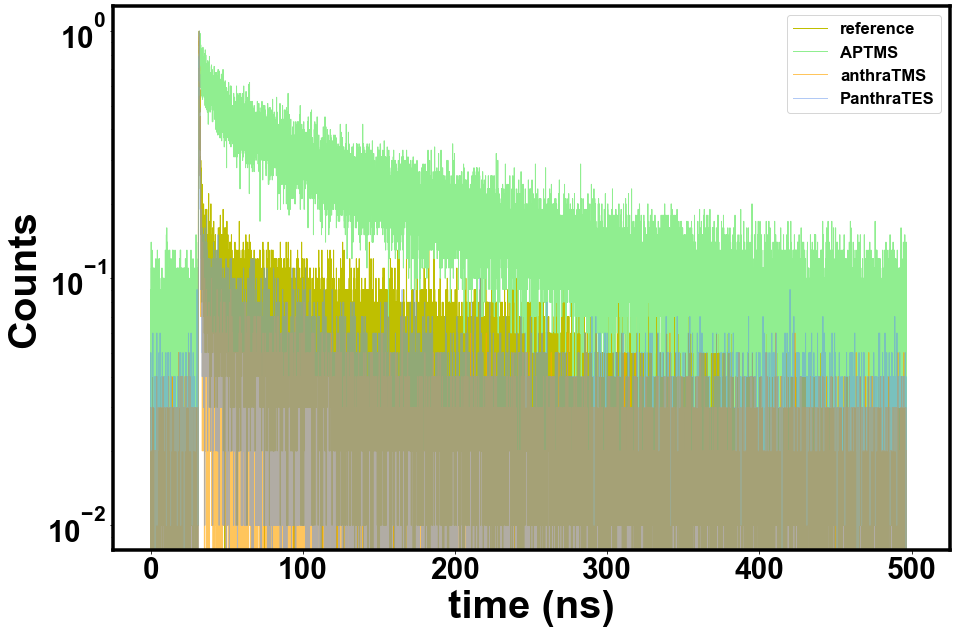

In [17]:
fig = plt.figure(figsize =(15, 10))

plt.plot(B1['XAxis'].values, B1['Counts'].values/np.max(B1['Counts'].values),'y', lw=1 , label='A1', alpha = 1)
plt.plot(B2['XAxis'].values, B2['Counts'].values/np.max(B2['Counts'].values),'lightgreen', lw=1 , label='A2', alpha = 1)
plt.plot(B3['XAxis'].values, B3['Counts'].values/np.max(B3['Counts'].values),'orange', lw=1 , label='A3', alpha = 0.64)
plt.plot(B4['XAxis'].values, B4['Counts'].values/np.max(B4['Counts'].values),'cornflowerblue', lw=1 , label='A4', alpha = 0.5)
plt.yscale('log')

fs = 40
plt.xlabel('time (ns)',{'fontsize': fs}, weight = "bold")
plt.ylabel('Counts',{'fontsize': fs}, weight = "bold")

plt.legend(["reference","APTMS", "anthraTMS", "PanthraTES"], fontsize = "small")

plt.show()

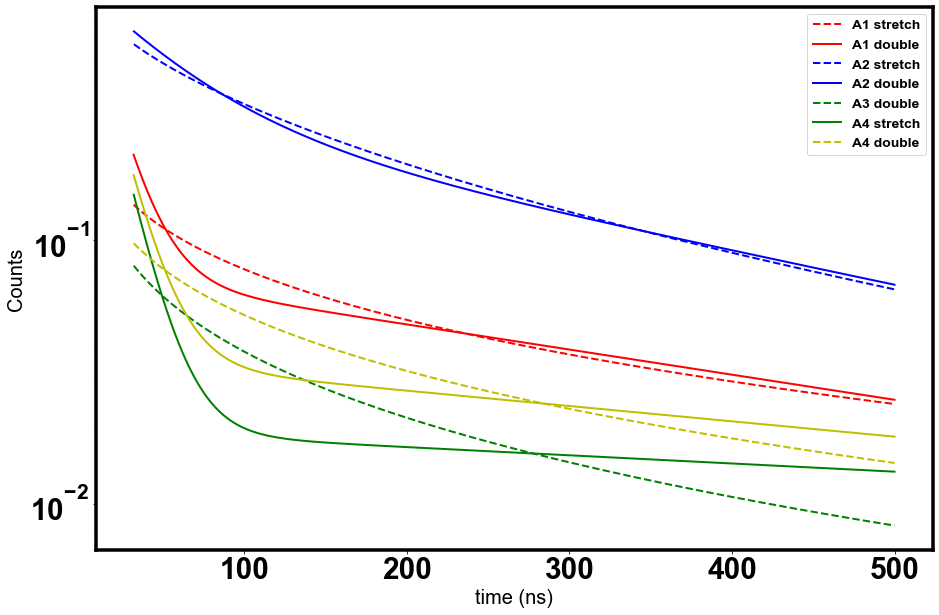

In [18]:

fig = plt.figure(figsize =(15, 10))


plt.plot(B1_fit['XAxis'].values, stretched_B1[4], 'r--', lw = 2, label="stretched exp fit")
plt.plot(B1_fit['XAxis'].values, double_B1[5], 'r-', lw = 2, label="double exp fit")
plt.yscale('log')

plt.plot(B2_fit['XAxis'].values, stretched_B2[4], 'b--', lw = 2, label="stretched exp fit")
plt.plot(B2_fit['XAxis'].values, double_B2[5], 'b-', lw = 2, label="double exp fit")
plt.yscale('log')

plt.plot(B3_fit['XAxis'].values, stretched_B3[4], 'g--', lw = 2, label="stretched exp fit")
plt.plot(B3_fit['XAxis'].values, double_B3[5], 'g-', lw = 2, label="double exp fit")
plt.yscale('log')

plt.plot(B4_fit['XAxis'].values, stretched_B4[4], 'y--', lw = 2, label="stretched exp fit")
plt.plot(B4_fit['XAxis'].values, double_B4[5], 'y-', lw = 2, label="double exp fit")

fs = 20
plt.xlabel('time (ns)',{'fontsize': fs})
plt.ylabel('Counts',{'fontsize': fs})

plt.legend(["A1 stretch", "A1 double","A2 stretch", "A2 double","A3 double", "A4 stretch", "A4 double"], fontsize = "x-small")

plt.yscale('log')

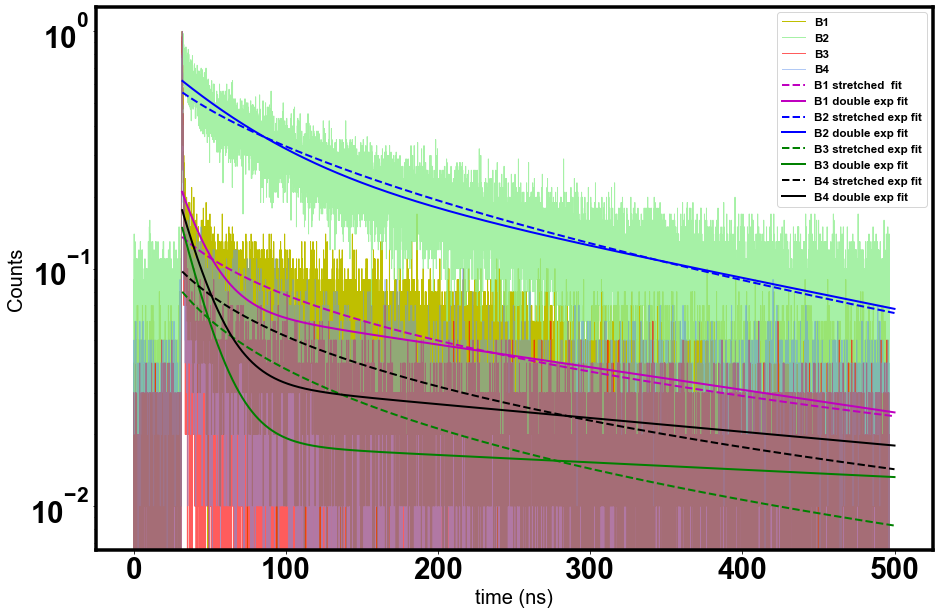

In [19]:
fig = plt.figure(figsize =(15, 10))

plt.plot(B1['XAxis'].values, B1['Counts'].values/np.max(B1['Counts'].values),'y', lw=1 , label='B1', alpha = 1)
plt.plot(B2['XAxis'].values, B2['Counts'].values/np.max(B2['Counts'].values),'lightgreen', lw=1 , label='B2', alpha = 0.8)
plt.plot(B3['XAxis'].values, B3['Counts'].values/np.max(B3['Counts'].values),'r', lw=1 , label='B3', alpha = 0.64)
plt.plot(B4['XAxis'].values, B4['Counts'].values/np.max(B4['Counts'].values),'cornflowerblue', lw=1 , label='B4', alpha = 0.5)
plt.yscale('log')

plt.plot(B1_fit['XAxis'].values, stretched_B1[4], 'm--', lw = 2, label="B1 stretched  fit")
plt.plot(B1_fit['XAxis'].values, double_B1[5], 'm-', lw = 2, label="B1 double exp fit")

plt.plot(B2_fit['XAxis'].values, stretched_B2[4], 'b--', lw = 2, label="B2 stretched exp fit")
plt.plot(B2_fit['XAxis'].values, double_B2[5], 'b-', lw = 2, label="B2 double exp fit")

plt.plot(B3_fit['XAxis'].values, stretched_B3[4], 'g--', lw = 2, label="B3 stretched exp fit")
plt.plot(B3_fit['XAxis'].values, double_B3[5], 'g-', lw = 2, label="B3 double exp fit")

plt.plot(B4_fit['XAxis'].values, stretched_B4[4], 'k--', lw = 2, label="B4 stretched exp fit")
plt.plot(B4_fit['XAxis'].values, double_B4[5], 'k-', lw = 2, label="B4 double exp fit")

fs = 20
plt.xlabel('time (ns)',{'fontsize': fs})
plt.ylabel('Counts',{'fontsize': fs})
plt.legend(loc = "upper right", fontsize = "xx-small")

plt.show()

In [20]:
############# Data With A1-A4 ################
  
# T1plotdata = [
#     1e9*np.array([double_A1[0],double_B1[0],double_C1[0]]),
#     1e9*np.array([double_A2[0],double_B2[0],double_C2[0]]),
#     1e9*np.array([double_A3[0],double_B3[0],double_C3[0]]),                                                        
#     1e9*np.array([double_A4[0],double_B4[0],double_C4[0]]),                                                        
#     ]

# T2plotdata = [
#     1e9*np.array([double_A1[2],double_B1[2],double_C1[2]]),
#     1e9*np.array([double_A2[2],double_B2[2],double_C2[2]]),
#     1e9*np.array([double_A3[2],double_B3[2],double_C3[2]]),                                                        
#     1e9*np.array([double_A4[2],double_B4[2],double_C4[2]]),                                                        
#     ]

# TAplotdata = [
#     1e9*np.array([double_A1[4],double_B1[4],double_C1[4]]),
#     1e9*np.array([double_A2[4],double_B2[4],double_C2[4]]),
#     1e9*np.array([double_A3[4],double_B3[4],double_C3[4]]),                                                        
#     1e9*np.array([double_A4[4],double_B4[4],double_C4[4]]),                                                        
#     ]

# TSplotdata = [
#     1e9*np.array([stretched_A1[3],stretched_B1[3],stretched_C1[3]]),
#     1e9*np.array([stretched_A2[3],stretched_B2[3],stretched_C2[3]]),
#     1e9*np.array([stretched_A3[3],stretched_B3[3],stretched_C3[3]]),
#     1e9*np.array([stretched_A4[3],stretched_B4[3],stretched_C4[3]]),                                                 
#     ]

# Bplotdata = [
#     np.array([stretched_A1[1],stretched_B1[1],stretched_C1[1]]),
#     np.array([stretched_A2[1],stretched_B2[1],stretched_C2[1]]),
#     np.array([stretched_A3[1],stretched_B3[1],stretched_C3[1]]),
#     np.array([stretched_A4[1],stretched_B4[1],stretched_C4[1]]),                                                 
#     ]

##############################################################################################
#############################  Data Without A1-A4   ########################################
  
T1plotdata = [
    1e9*np.array([double_B1[0],double_C1[0]]),
    1e9*np.array([double_B2[0],double_C2[0]]),
    1e9*np.array([double_B3[0],double_C3[0]]),                                                        
    1e9*np.array([double_B4[0],double_C4[0]]),                                                        
    ]

T2plotdata = [
    1e9*np.array([double_B1[2],double_C1[2]]),
    1e9*np.array([double_B2[2],double_C2[2]]),
    1e9*np.array([double_B3[2],double_C3[2]]),                                                        
    1e9*np.array([double_B4[2],double_C4[2]]),                                                        
    ]

TAplotdata = [
    1e9*np.array([double_B1[4],double_C1[4]]),
    1e9*np.array([double_B2[4],double_C2[4]]),
    1e9*np.array([double_B3[4],double_C3[4]]),                                                        
    1e9*np.array([double_B4[4],double_C4[4]]),                                                        
    ]

TSplotdata = [
    1e9*np.array([stretched_B1[3],stretched_C1[3]]),
    1e9*np.array([stretched_B2[3],stretched_C2[3]]),
    1e9*np.array([stretched_B3[3],stretched_C3[3]]),
    1e9*np.array([stretched_B4[3],stretched_C4[3]]),                                                 
    ]

Bplotdata = [
    np.array([stretched_B1[1],stretched_C1[1]]),
    np.array([stretched_B2[1],stretched_C2[1]]),
    np.array([stretched_B3[1],stretched_C3[1]]),
    np.array([stretched_B4[1],stretched_C4[1]]),                                                 
    ]


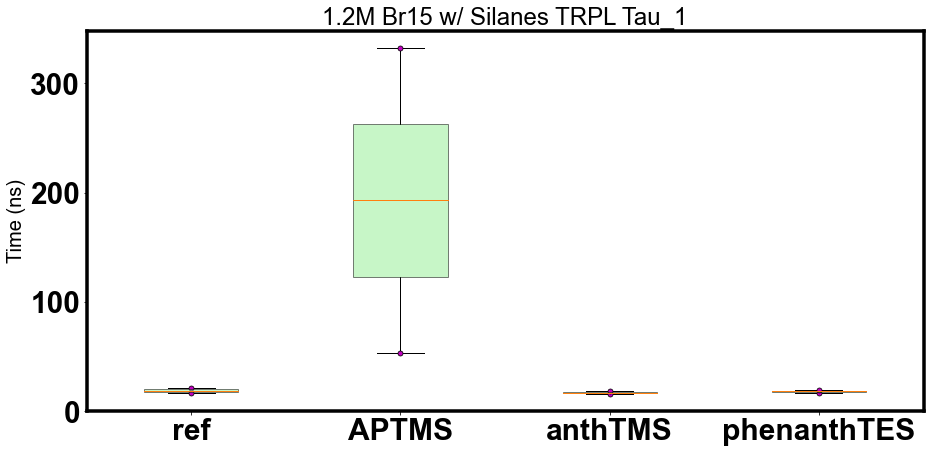

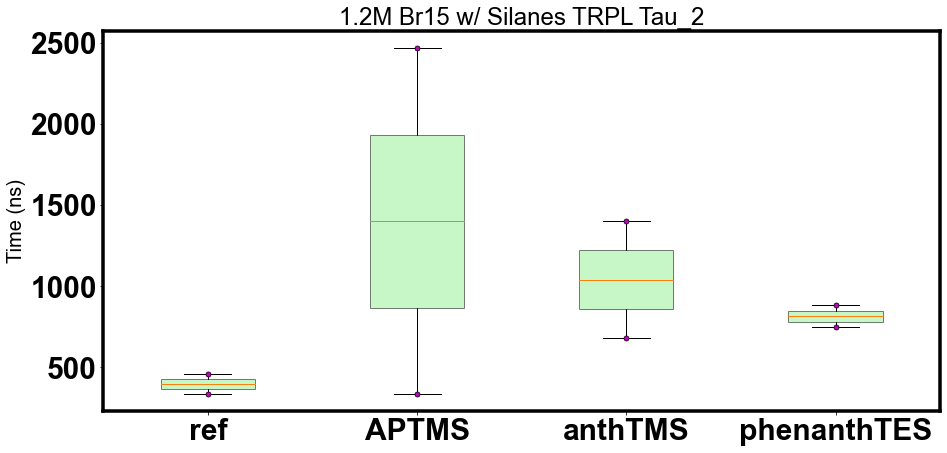

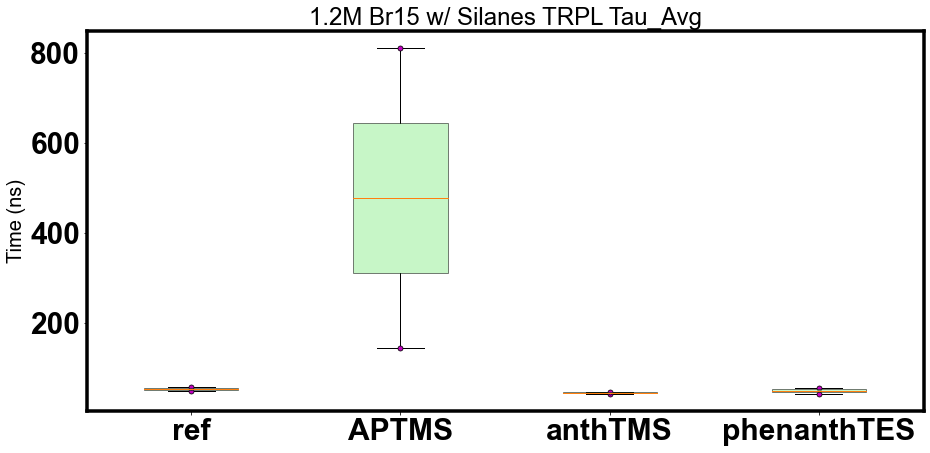

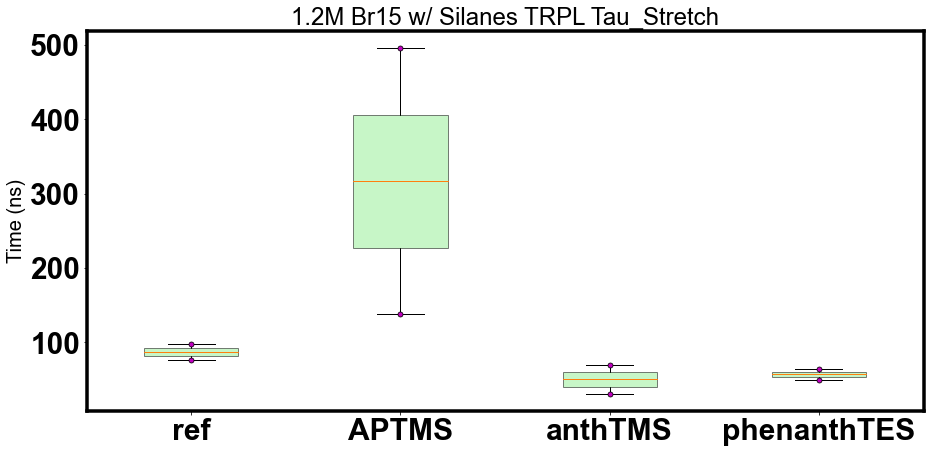

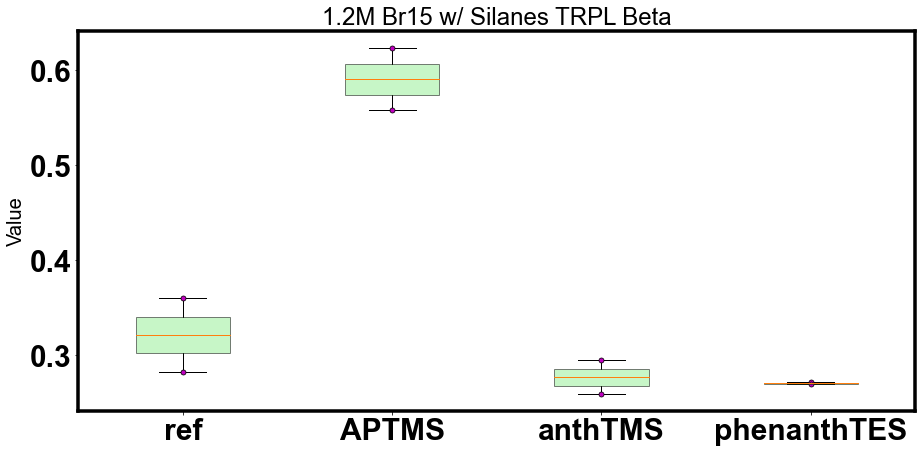

In [21]:
##############Tau_1#########
fig = plt.figure(figsize =(15, 7))
ax = fig.add_subplot(111)
 
bp = ax.boxplot(T1plotdata, patch_artist=True, boxprops=dict(facecolor='lightgreen', alpha = 0.5))
plt.plot([1,2,3,4],T1plotdata, ".", color = "m", ms = "10", mec = "k", mew = "0.75")

ax.set_xticklabels(["ref", "APTMS", "anthTMS", "phenanthTES"])
plt.title("1.2M Br15 w/ Silanes TRPL Tau_1")
plt.ylabel("Time (ns)")
plt.show()
print()
print()
print()
#############################
##############Tau_2########
fig = plt.figure(figsize =(15, 7))
ax = fig.add_subplot(111)

bp = ax.boxplot(T2plotdata, patch_artist=True, boxprops=dict(facecolor='lightgreen', alpha = 0.5))
plt.plot([1,2,3,4],T2plotdata, ".", color = "m", ms = "10", mec = "k", mew = "0.75")

ax.set_xticklabels(["ref", "APTMS", "anthTMS", "phenanthTES"])
plt.title("1.2M Br15 w/ Silanes TRPL Tau_2")
plt.ylabel("Time (ns)")
plt.show()
print()
print()
print()
##########################
#########Tau_Avg##########
fig = plt.figure(figsize =(15, 7))
ax = fig.add_subplot(111)

bp = ax.boxplot(TAplotdata, patch_artist=True, boxprops=dict(facecolor='lightgreen', alpha = 0.5))
plt.plot([1,2,3,4],TAplotdata, ".", color = "m", ms = "10", mec = "k", mew = "0.75")

ax.set_xticklabels(["ref", "APTMS", "anthTMS", "phenanthTES"])
plt.title("1.2M Br15 w/ Silanes TRPL Tau_Avg")
plt.ylabel("Time (ns)")
plt.show()
print()
print()
print()
#############################
#########Tau_Stretch##########
fig = plt.figure(figsize =(15, 7))
ax = fig.add_subplot(111)
 
bp = ax.boxplot(TSplotdata, patch_artist=True, boxprops=dict(facecolor='lightgreen', alpha = 0.5))
plt.plot([1,2,3,4],TSplotdata, ".", color = "m", ms = "10", mec = "k", mew = "0.75")

ax.set_xticklabels(["ref", "APTMS", "anthTMS", "phenanthTES"])
plt.title("1.2M Br15 w/ Silanes TRPL Tau_Stretch")
plt.ylabel("Time (ns)")
plt.show()
print()
print()
print()
#######################
#########Beta##########

fig = plt.figure(figsize =(15, 7))
ax = fig.add_subplot(111)
 
bp = ax.boxplot(Bplotdata, patch_artist=True, boxprops=dict(facecolor='lightgreen', alpha = 0.5))
plt.plot([1,2,3,4],Bplotdata, ".", color = "m", ms = "10", mec = "k", mew = "0.75")

ax.set_xticklabels(["ref", "APTMS", "anthTMS", "phenanthTES"])
plt.title("1.2M Br15 w/ Silanes TRPL Beta")
plt.ylabel("Value")
plt.show()
